In [43]:
import covid_feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Population")

C:\Users\mwrep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


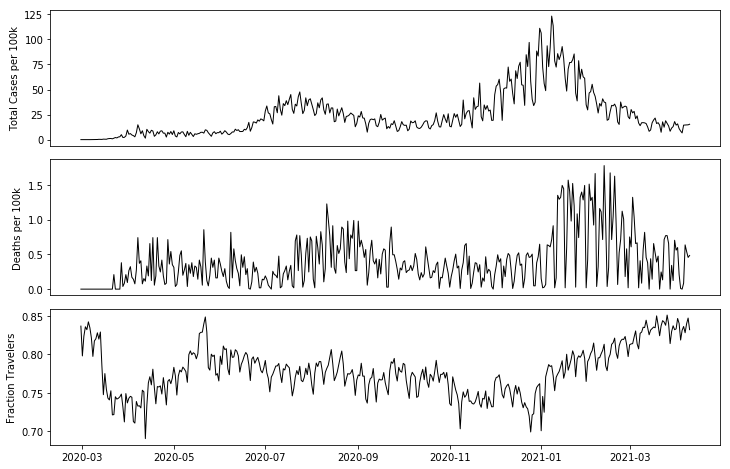

In [71]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates,state_X["total_cases"],color='k',lw=1)
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates,state_X["deaths"],color='k',lw=1)
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates,state_y,color='k',lw=1)
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

In [47]:
# this sees if "total_cases" granger causes state_y
combined_data = pd.concat([state_y.reset_index(drop=True),state_X["total_cases"]],axis=1)
gct = grangercausalitytests(combined_data,maxlag=15,verbose=False)
p_val_dict = {}
for key in gct.keys():
    p_value = gct[key][0]['ssr_ftest'][1]
    p_val_dict[key] = p_value
p_val_dict

{1: 0.01664464515004257,
 2: 0.015711686171860546,
 3: 0.11787050816503103,
 4: 0.013476471064061421,
 5: 0.004784994785203016,
 6: 2.7147360346909922e-11,
 7: 1.7716772569696635e-08,
 8: 2.5189039454051904e-06,
 9: 6.965117083338334e-06,
 10: 1.9436559789961613e-05,
 11: 2.732762878511572e-05,
 12: 5.500653331252342e-05,
 13: 1.2474928551502117e-05,
 14: 4.902961457979399e-06,
 15: 9.424028785329021e-05}

In [4]:
# this sees if "total_cases" granger causes state_y
combined_data = pd.concat([state_y.reset_index(drop=True),state_X["deaths"]],axis=1)
gct = grangercausalitytests(combined_data,maxlag=15,verbose=False)
p_val_dict = {}
for key in gct.keys():
    p_value = gct[key][0]['ssr_ftest'][1]
    p_val_dict[key] = p_value
p_val_dict

{1: 0.02212558191019333,
 2: 0.04787417960018308,
 3: 0.2516715081426325,
 4: 0.3791409398029668,
 5: 0.08136250518215676,
 6: 0.0004424545633249673,
 7: 1.526543545899632e-06,
 8: 0.009437192977322525,
 9: 0.041848631061507865,
 10: 0.06847143832288843,
 11: 0.10173117683076763,
 12: 0.12865530728908098,
 13: 0.024223276533779505,
 14: 0.028333611293043234,
 15: 0.16589951089756425}

In [140]:
vector_data = pd.concat([state_y.reset_index(drop=True),state_X["total_cases"],state_X["deaths"]],axis=1)
vector_data_train = vector_data.iloc[:int(0.75*len(vector_data)),:]
vector_data_test = vector_data.iloc[int(0.75*len(vector_data)):,:]
vector_data_train

,Population Not Staying at Home,total_cases,deaths
0,0.836725,0.019012,0.000000
1,0.797960,0.000000,0.000000
2,0.823699,0.009506,0.000000
3,0.835889,0.019012,0.000000
4,0.832086,0.019012,0.000000
...,...,...,...
300,0.699127,58.234845,0.465803
301,0.721284,40.277675,0.503827
302,0.722816,33.937055,0.047531
303,0.749195,37.406810,0.047531


In [141]:
y_stationarity = adfuller(vector_data_train["Population Not Staying at Home"])
y_adf, y_pval = y_stationarity[0], y_stationarity[1]

total_cases_stationarity = adfuller(vector_data_train["total_cases"])
total_cases_adf, total_cases_pval = total_cases_stationarity[0], total_cases_stationarity[1]

death_stationarity = adfuller(vector_data_train["deaths"])
death_adf, death_pval = death_stationarity[0], death_stationarity[1]

print("Y-Value\n------------------------------\nADF Stat: {}\np-value: {}".format(y_adf, y_pval))
print("\nTotal Cases per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(total_cases_adf, total_cases_pval))
print("\nDeaths per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(death_adf, death_pval))

Y-Value
------------------------------
ADF Stat: -2.9779921606960125
p-value: 0.037001398307554514

Total Cases per 100k
------------------------------
ADF Stat: -0.43131765013169066
p-value: 0.9047370763134213

Deaths per 100k
------------------------------
ADF Stat: -2.4113102014975984
p-value: 0.13856960091746368


In [142]:
vector_data_diff = vector_data_train.diff().dropna()

In [143]:
y_stationarity = adfuller(vector_data_diff["Population Not Staying at Home"])
y_adf, y_pval = y_stationarity[0], y_stationarity[1]

total_cases_stationarity = adfuller(vector_data_diff["total_cases"])
total_cases_adf, total_cases_pval = total_cases_stationarity[0], total_cases_stationarity[1]

death_stationarity = adfuller(vector_data_diff["deaths"])
death_adf, death_pval = death_stationarity[0], death_stationarity[1]

print("Y-Value\n------------------------------\nADF Stat: {}\np-value: {}".format(y_adf, y_pval))
print("\nTotal Cases per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(total_cases_adf, total_cases_pval))
print("\nDeaths per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(death_adf, death_pval))

Y-Value
------------------------------
ADF Stat: -4.72041847403826
p-value: 7.702634687143356e-05

Total Cases per 100k
------------------------------
ADF Stat: -2.6779440023524694
p-value: 0.07793329975461377

Deaths per 100k
------------------------------
ADF Stat: -7.687659752987802
p-value: 1.447128207049345e-11


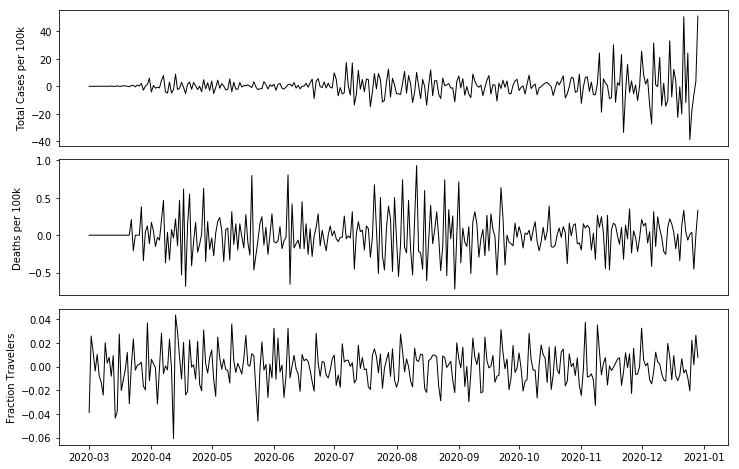

In [145]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[1:int(0.75*len(vector_data))], vector_data_diff["total_cases"],color='k',lw=1)
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[1:int(0.75*len(vector_data))], vector_data_diff["deaths"],color='k',lw=1)
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[1:int(0.75*len(vector_data))], vector_data_diff["Population Not Staying at Home"],color='k',lw=1)
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


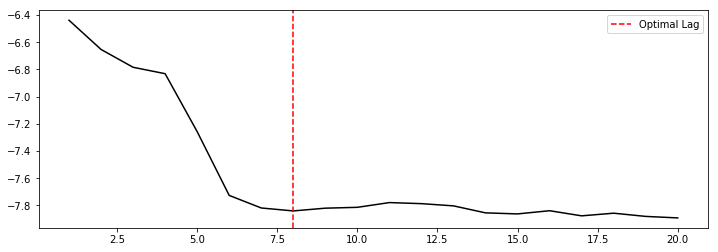

In [146]:
model = VAR(vector_data_diff1,dates=dates[1:])
aic_vals = []
best_lag = None
lag_range = np.arange(1,21,1)
for i in lag_range:
    result = model.fit(i)
    aic_vals.append(result.aic)
    if (best_lag == None) and (i > 1) and (aic_vals[-1]-aic_vals[-2] > 0):
        best_lag = i-1

fig = plt.figure(figsize=(12,4))

plt.plot(lag_range, aic_vals, color='k')
plt.axvline(best_lag,color='red',linestyle='--',label="Optimal Lag")

plt.legend()
plt.show()

In [147]:
fit_model = VAR(vector_data_diff,dates=dates[1:int(0.95*len(vector_data))]).fit(best_lag)
fit_model.summary()

C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 29, Apr, 2021
Time:                     21:42:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.42285
Nobs:                     296.000    HQIC:                  -7.98353
Log likelihood:           51.9531    FPE:                0.000234818
AIC:                     -8.35791    Det(Omega_mle):     0.000184116
--------------------------------------------------------------------
Results for equation Population Not Staying at Home
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                    -0.000122         0.000761           -0.160           0.873
L1.Population Not Staying at Home        -0.270466      

In [148]:
durbin_watson(fit_model.resid)

array([1.98085012, 2.04198973, 2.01348341])

In [149]:
lag_num = fit_model.k_ar
input_data = vector_data_diff.values[-lag_num:]

In [150]:
forecast = fit_model.forecast(y=input_data, steps=len(vector_data_test))
forecast = pd.DataFrame(forecast, index=vector_data.index[-len(vector_data_test):], columns=vector_data.columns)

In [151]:
forecast_copy = forecast.copy()
cols = vector_data_train.columns
for col in cols:        
    forecast_copy[str(col)+'_forecast'] = vector_data_train[col].iloc[-1] + forecast_copy[str(col)].cumsum()
proper_forecast = forecast_copy.iloc[:,3:]
proper_forecast

,Population Not Staying at Home_forecast,total_cases_forecast,deaths_forecast
305,0.755919,85.971260,0.723260
306,0.737829,84.028540,0.542749
307,0.724779,58.993395,0.333189
308,0.720188,35.853620,0.185082
309,0.721234,38.138023,-0.044255
...,...,...,...
402,0.713961,82.563606,0.500408
403,0.701179,70.558819,0.258559
404,0.699036,68.443313,0.168701
405,0.708892,77.922636,0.300703


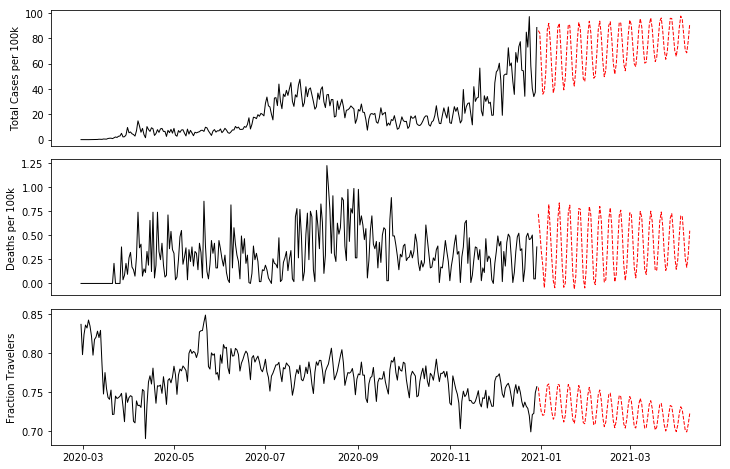

In [153]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[:int(0.75*len(vector_data))],vector_data_train["total_cases"],color='k',lw=1)
ax[0].plot(dates[int(0.75*len(vector_data)):],proper_forecast["total_cases_forecast"],color='r',lw=1,linestyle='--')
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[:int(0.75*len(vector_data))],vector_data_train["deaths"],color='k',lw=1)
ax[1].plot(dates[int(0.75*len(vector_data)):],proper_forecast["deaths_forecast"],color='r',lw=1,linestyle='--')
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[:int(0.75*len(vector_data))],vector_data_train["Population Not Staying at Home"],color='k',lw=1)
ax[2].plot(dates[int(0.75*len(vector_data)):],proper_forecast["Population Not Staying at Home_forecast"],color='r',lw=1,linestyle='--')
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

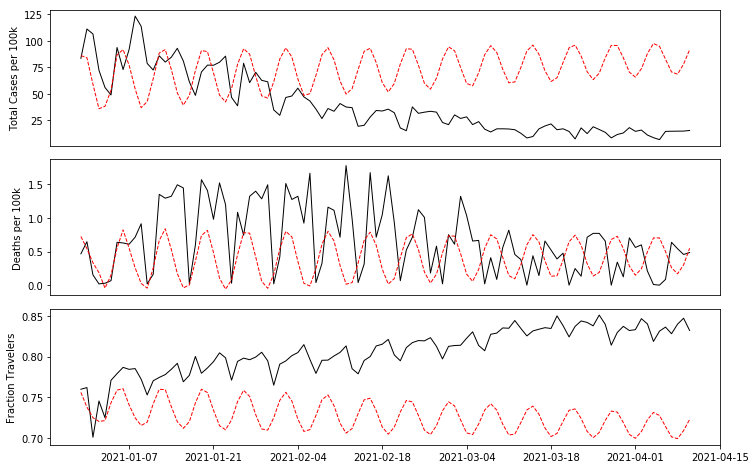

In [154]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[int(0.75*len(vector_data)):],vector_data_test["total_cases"],color='k',lw=1)
ax[0].plot(dates[int(0.75*len(vector_data)):],proper_forecast["total_cases_forecast"],color='r',lw=1,linestyle='--')
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[int(0.75*len(vector_data)):],vector_data_test["deaths"],color='k',lw=1)
ax[1].plot(dates[int(0.75*len(vector_data)):],proper_forecast["deaths_forecast"],color='r',lw=1,linestyle='--')
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[int(0.75*len(vector_data)):],vector_data_test["Population Not Staying at Home"],color='k',lw=1)
ax[2].plot(dates[int(0.75*len(vector_data)):],proper_forecast["Population Not Staying at Home_forecast"],color='r',lw=1,linestyle='--')
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()